In [23]:
import cv2
import math
from ultralytics import YOLO

In [24]:
class ObjectDetection:

    def __init__(self, model_path):
        self.model = YOLO(model_path)
        self.class_names_dict = self.model.model.names
        self.class_colors = self.generate_class_colors()

    def generate_class_colors(self):
        # Generate a list of unique colors for each class
        return [(int(h), int(s), int(v)) for h, s, v in zip(range(0, 256, int(256/len(self.class_names_dict))), [255]*len(self.class_names_dict), [255]*len(self.class_names_dict))]

    def predict(self, frame):
        return self.model(frame)

    def draw_bounding_boxes(self, img, results):
        for r in results:
            boxes = r.boxes
            for box in boxes:
                x1, y1, x2, y2 = map(int, box.xyxy[0])
                class_id = int(box.cls[0])

                # Use a unique color for each class
                box_color = self.class_colors[class_id]

                cv2.rectangle(img, (x1, y1), (x2, y2), box_color, 3)

                conf = math.ceil((box.conf[0] * 100)) / 100
                class_name = self.class_names_dict[class_id]

                # Use a unique color for text associated with each class
                text_color = (255, 255, 255) 

                label = f'{class_name} {conf}'

                # Increase text size and make it white for better visibility
                font_scale = 1.5
                font_thickness = 3

                t_size = cv2.getTextSize(label, cv2.FONT_HERSHEY_SIMPLEX, fontScale=font_scale, thickness=font_thickness)[0]
                c2 = x1 + t_size[0], y1 - t_size[1] - 3

                # Use the same color for the text label
                cv2.rectangle(img, (x1, y1), c2, box_color, -1, cv2.LINE_AA)  # filled
                cv2.putText(img, label, (x1, y1 - 2), cv2.FONT_HERSHEY_SIMPLEX, font_scale, text_color, thickness=font_thickness, lineType=cv2.LINE_AA)

        return img


In [25]:
image = "../ReferenceImages/image1.png"
# type(img)

frame = cv2.imread(image)

# Example of usage
model_path = "../yolov8m.pt"  # Path to YOLO model file
detector = ObjectDetection(model_path)

# Assuming 'frame' is input image
results = detector.predict(frame)
output_img = detector.draw_bounding_boxes(frame.copy(), results)

# # Display the result
# cv2.imshow('YOLOv8 Detection', output_img)
# cv2.waitKey(0)
# cv2.destroyAllWindows()


0: 384x640 1 person, 2 suitcases, 1 bottle, 1 keyboard, 61.0ms
Speed: 6.4ms preprocess, 61.0ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


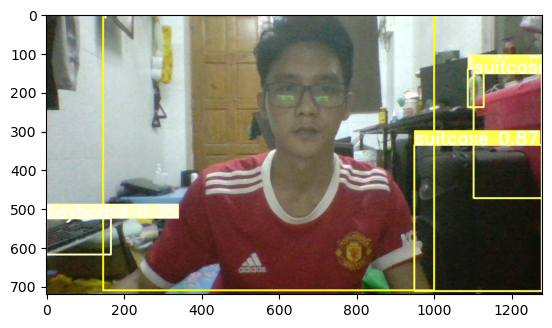

In [26]:
from matplotlib import pyplot as plt

out = cv2.cvtColor(output_img, cv2.COLOR_BGR2RGB)
plt.imshow(out)